In [21]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END

In [22]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber1: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [23]:
def sum_node(state: AgentState) -> AgentState:
    """This node sums two numbers."""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def decide_node(state: AgentState) -> AgentState:
    """This node decides which operation to perform."""
    if state['operation'] == "+":
        return "add_operation"
    else:
        return "subtract_operation"
    
def sum_node2(state: AgentState) -> AgentState:
    """This node sums two numbers."""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_node2(state: AgentState) -> AgentState:
    """This node decides which operation to perform."""
    if state['operation2'] == "+":
        return "add_operation2"
    else:
        return "subtract_operation2"


In [24]:
graph = StateGraph(AgentState)
graph.add_node("adder", sum_node)
graph.add_node("subtractor", subtract_node)

graph.add_node("decider", lambda state: state)

graph.add_edge(START, "decider")
graph.add_conditional_edges(
    "decider",
     decide_node, 
     {
        "add_operation": "adder",
        "subtract_operation": "subtractor"
     })

graph.add_edge("adder", "decider2")
graph.add_edge("subtractor", "decider2")

graph.add_node("adder2", sum_node2)
graph.add_node("subtractor2", subtract_node2)
graph.add_node("decider2", lambda state: state)
graph.add_conditional_edges(
    "decider2",
     decide_node2, 
     {
        "add_operation2": "adder2",
        "subtract_operation2": "subtractor2"
     })
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)





app = graph.compile()

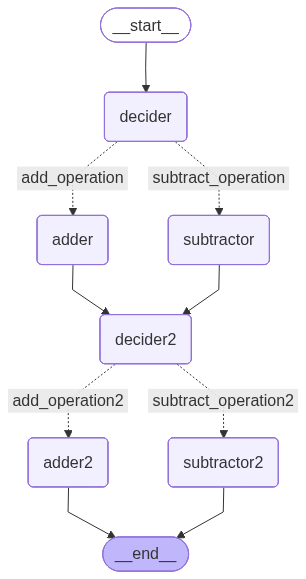

In [25]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
result = app.invoke({"number1": 10, "operation": "vv", "number2": 5, "number3": 20, "operation2": "-", "number4": 8})

In [29]:
result['finalNumber1'], result['finalNumber2']

(5, 12)